## Edge Detection

In [5]:
import matplotlib.pyplot as plt
from skimage import io, color, exposure, filters
import numpy as np

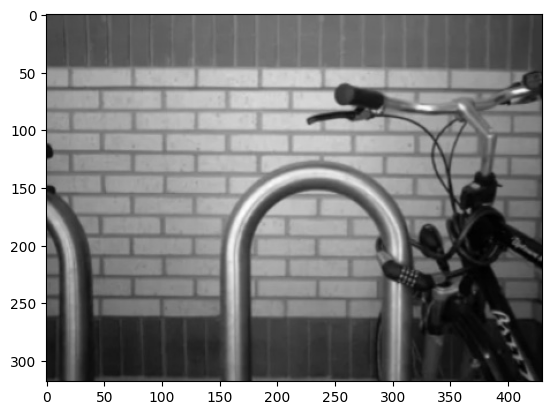

In [3]:
image_wall = io.imread("C:/Users/megan/OneDrive/Desktop/DIP Images/wall.jpg")
plt.imshow(image_wall)

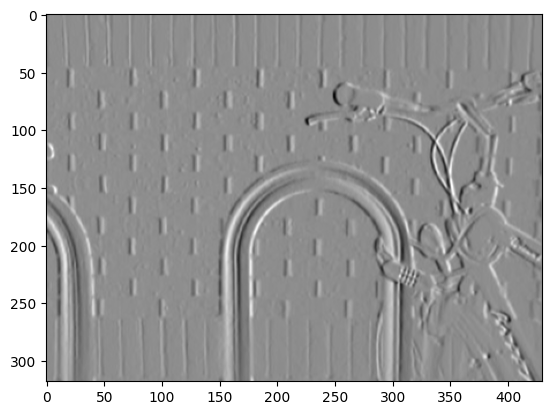

In [ ]:
img_wall = color.rgb2gray(image_wall)   # Convert RGB to gray
img_edge_vertical = filters.sobel_v(img_wall)
plt.imshow(img_edge_vertical, cmap="gray")

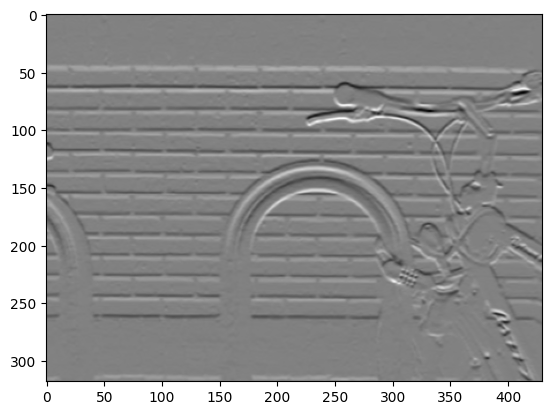

In [7]:
img_edge_hor = filters.sobel_h(img_wall)
plt.imshow(img_edge_hor, cmap = "gray")

In [8]:
np.min(img_edge_hor)

-0.5519607843137255

In [9]:
np.max(img_edge_hor)

0.5392156862745099

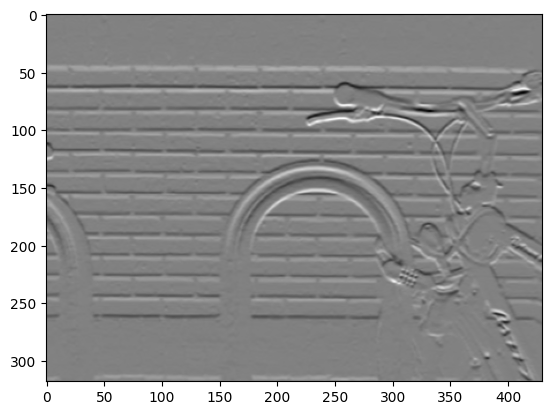

In [10]:
rescaled_image = exposure.rescale_intensity(img_edge_hor, out_range = (0, 255))
plt.imshow(rescaled_image, cmap = "gray")

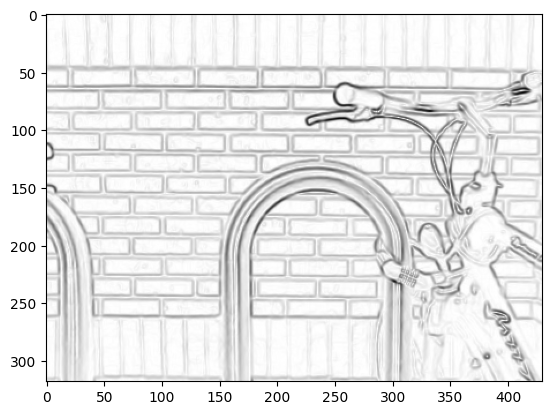

In [12]:
img_edge = filters.sobel(img_wall)
plt.imshow(255-img_edge, cmap = "gray")

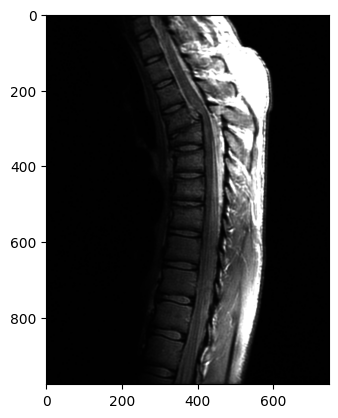

In [17]:
img_spine = io.imread("C:/Users/megan/OneDrive/Desktop/DIP Images/spine.tif")
plt.imshow(img_spine, cmap = "gray")

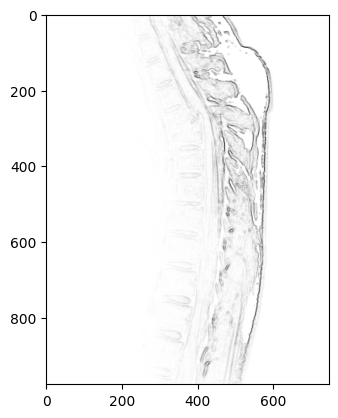

In [19]:
img_edge = filters.sobel(img_spine)
plt.imshow(255 - img_edge, cmap = "gray")

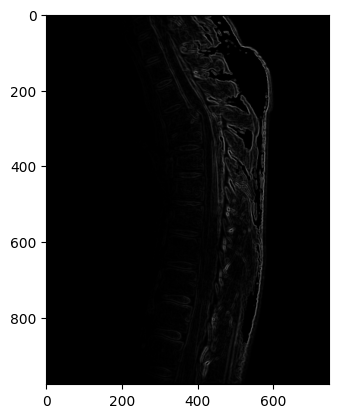

In [ ]:
img_edge = filters.roberts(img_spine)
plt.imshow(img_edge, cmap = "gray")

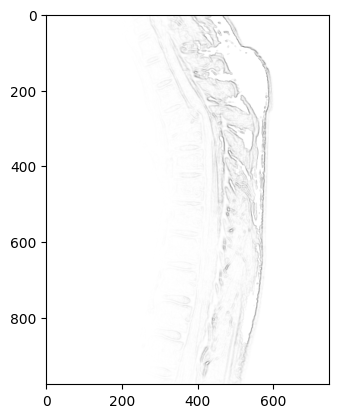

In [22]:
# Converted to negavtive image
plt.imshow(255 - img_edge, cmap = "gray")

In [ ]:
kernel = np.ones((3,3)) * 1/9  # Can change kernel size ex. 35,35  (Averaging Filter/Smoothing Filter)
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [26]:
from scipy import ndimage

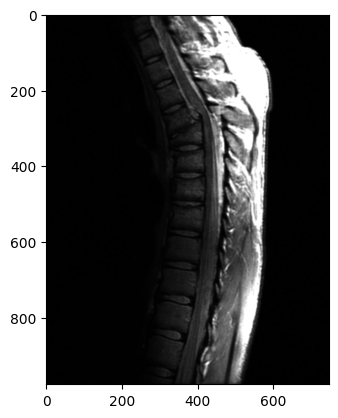

In [27]:
# img_soft = ndimage.convolve(img_spine, kernel, mode = "constant")
img_soft = ndimage.convolve(img_spine, kernel)
plt.imshow(img_soft, cmap = "gray")

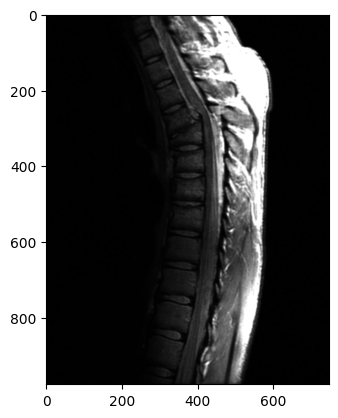

In [ ]:
kernl = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Laplacian Filter (Sharpening Filter)
img_edge = ndimage.convolve(img_spine, kernel)
plt.imshow(img_edge, cmap = "gray")

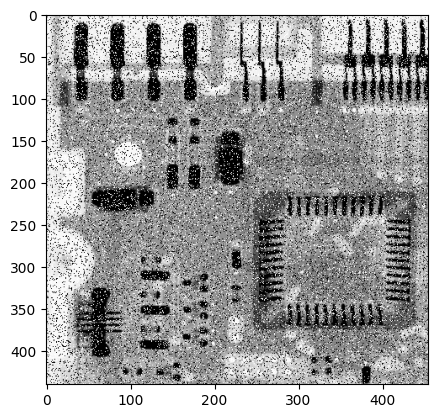

In [37]:
img_noisy = io.imread("C:/Users/megan/OneDrive/Desktop/DIP Images/noisy.tif")
plt.imshow(img_noisy, cmap = "gray")

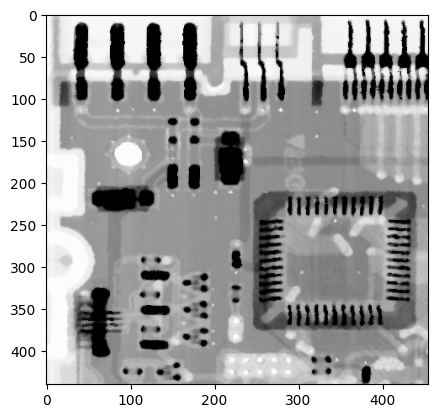

In [30]:
img_denoise = filters.median(img_noisy, footprint = np.ones((5,5)))
plt.imshow(img_denoise, cmap = "gray")

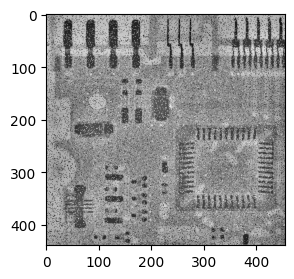

In [31]:
img_denoise = filters.butterworth(img_noisy, high_pass = True, cutoff_frequency_ratio = 0.01)
plt.figure(figsize = (6,3))
plt.imshow(img_denoise, cmap = "gray")

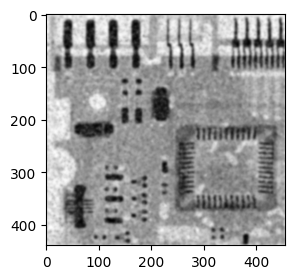

In [34]:
img_denoise = filters.butterworth(img_noisy, high_pass = False, cutoff_frequency_ratio = 0.1)
plt.figure(figsize = (6,3))
plt.imshow(img_denoise, cmap = "gray")

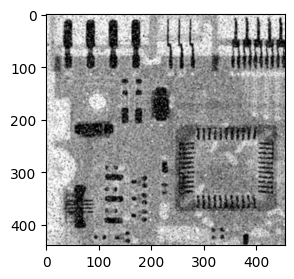

In [35]:
kernel_soft = np.ones([3,3])/9
img_denoise = ndimage.convolve(img_noisy, kernel)
plt.figure(figsize =(6,3))
plt.imshow(img_denoise, cmap = "gray")


## Fourier Transform

In [2]:
from skimage import io, exposure, color

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

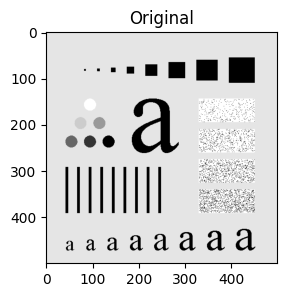

In [3]:
img_let = io.imread("C:/Users/megan/OneDrive/Desktop/DIP Images/letter.tif")
plt.figure(figsize=(6,3))
plt.imshow(img_let, cmap="gray")
plt.title('Original')
plt.show()

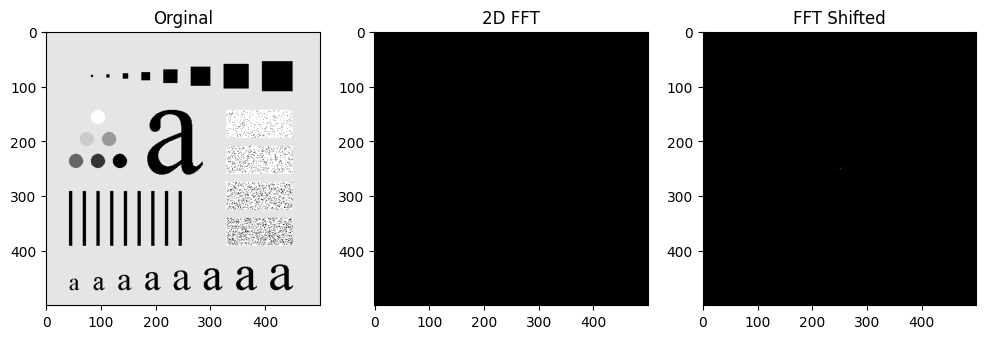

In [5]:
fft_result = fft2(img_let)

fft_shifted = fftshift(fft_result)
plt.figure(figsize = (12, 6))

plt.subplot(1,3,1)
plt.imshow(img_let, cmap="gray")
plt.title("Orginal")

plt.subplot(1,3,2)
plt.imshow(np.abs(fft_result), cmap = "gray")
plt.title("2D FFT")

plt.subplot(1,3,3)
plt.imshow(np.abs(fft_shifted), cmap="gray")

plt.title("FFT Shifted")

plt.show()

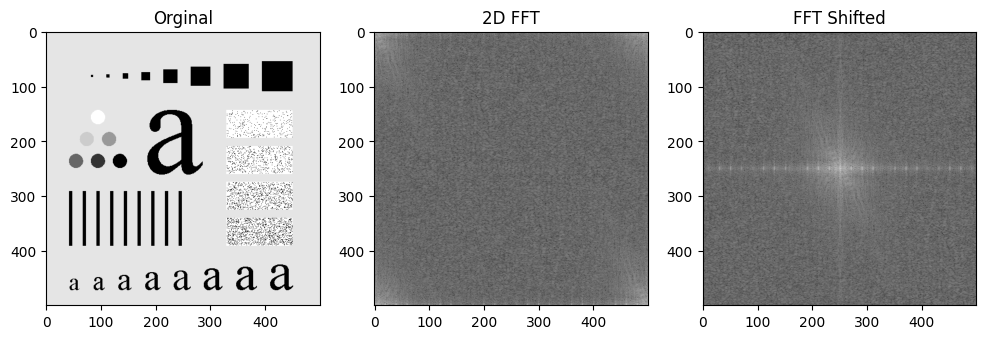

In [6]:
fft_result = fft2(img_let)

fft_shifted = fftshift(fft_result)

plt.figure(figsize = (12, 6))

plt.subplot(1,3,1)
plt.imshow(img_let, cmap="gray")
plt.title("Orginal")

plt.subplot(1,3,2)
plt.imshow(np.log(1 + np.abs(fft_result)), cmap = "gray")
plt.title("2D FFT")

plt.subplot(1,3,3)
plt.imshow(np.log(1 + np.abs(fft_shifted)), cmap = "gray")

plt.title("FFT Shifted")

plt.show()


## Ideal High Pass Filter

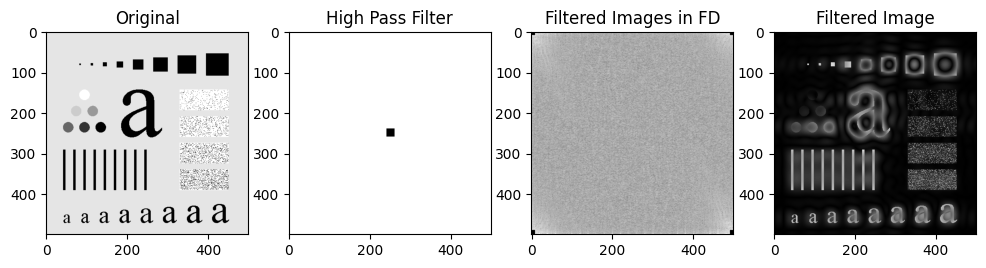

In [7]:
image = io.imread("C:/Users/megan/OneDrive/Desktop/DIP Images/letter.tif")

if len(image.shape) == 3:   
    image = color.rgb2gray(image)

fft_image = fft2(image)

fft_image_shifted = fftshift(fft_image)

# Create a high pass filter
rows, cols = image.shape
center_row, center_col = rows // 2, cols //2
cutoff_frerquency = 10
high_pass_filter = np.ones((rows, cols))
high_pass_filter[center_row - cutoff_frerquency:center_row + cutoff_frerquency,
                 center_col - cutoff_frerquency: center_col + cutoff_frerquency] = 0

fft_image_filtered = fft_image_shifted * high_pass_filter

fft_image_filtered_shifted = np.fft.ifftshift(fft_image_filtered)

filtered_image = np.abs(ifft2(fft_image_filtered_shifted))

plt.figure(figsize = ((12,6)))

plt.subplot(1,4,1)
plt.imshow(image, cmap = "gray")
plt.title("Original")

plt.subplot(1,4,2)
plt.imshow(high_pass_filter, cmap = "gray")
plt.title("High Pass Filter")

plt.subplot(1,4,3)
plt.imshow(np.log(1 + np.abs(fft_image_filtered)), cmap = "gray")
plt.imshow(np.log(1 + np.abs(fft_image_filtered_shifted)), cmap = "gray")
plt.title("Filtered Images in FD")

plt.subplot(1,4,4)
plt.imshow(filtered_image, cmap = "gray")
plt.title("Filtered Image")

plt.show()
